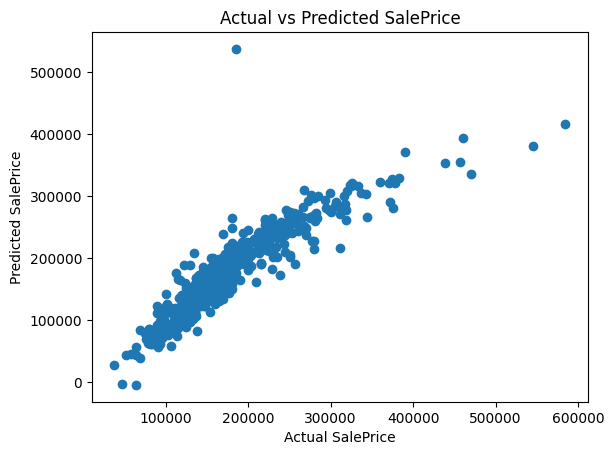

RMSE: 31369.528663183442
R^2: 0.8136294149340317


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline 

# Load the Ames house pricing dataset
Ames_dataset = pd.read_csv("AmesHousing.csv")

# Fill missing values for categorical columns
Ames_dataset['Alley'].fillna('No Alley', inplace=True)
Ames_dataset['Mas Vnr Type'].fillna('None', inplace=True)
Ames_dataset['Bsmt Qual'].fillna('No Basement', inplace=True)
Ames_dataset['Bsmt Cond'].fillna('No Basement', inplace=True)
Ames_dataset['Bsmt Exposure'].fillna('No Exposure', inplace=True)
Ames_dataset['BsmtFin Type 1'].fillna('No Basement', inplace=True)
Ames_dataset['BsmtFin Type 2'].fillna('No Basement', inplace=True)
Ames_dataset['Garage Yr Blt'].fillna(0, inplace=True)
Ames_dataset['Garage Finish'].fillna('No Garage', inplace=True)
Ames_dataset['Garage Qual'].fillna('No Garage', inplace=True)
Ames_dataset['Garage Cond'].fillna('No Garage', inplace=True)
Ames_dataset['Fence'].fillna('No Fence', inplace=True)
Ames_dataset['Misc Feature'].fillna('None', inplace=True)
Ames_dataset['Fireplace Qu'].fillna('No Fireplace', inplace=True)
Ames_dataset['Garage Type'].fillna('No Garage', inplace=True)
Ames_dataset['Pool QC'].fillna('No Pool', inplace=True)
Ames_dataset['Electrical'].fillna(Ames_dataset['Electrical'].mode()[0], inplace=True)

# Fill missing values for numerical columns
Ames_dataset['Mas Vnr Area'].fillna(Ames_dataset['Mas Vnr Area'].median(), inplace=True)
Ames_dataset['BsmtFin SF 1'].fillna(0, inplace=True)
Ames_dataset['BsmtFin SF 2'].fillna(0, inplace=True)
Ames_dataset['Bsmt Unf SF'].fillna(0, inplace=True)
Ames_dataset['Total Bsmt SF'].fillna(0, inplace=True)
Ames_dataset['Bsmt Full Bath'].fillna(0, inplace=True)
Ames_dataset['Bsmt Half Bath'].fillna(0, inplace=True)
Ames_dataset['Garage Cars'].fillna(0, inplace=True)
Ames_dataset['Garage Area'].fillna(0, inplace=True)

# Using k-NN imputer for Lot Frontage
imputer = KNNImputer(n_neighbors=5)
Ames_dataset[['Lot Frontage']] = imputer.fit_transform(Ames_dataset[['Lot Frontage']])

# Feature Engineering
Ames_dataset['TotalFinishedSF'] = Ames_dataset['BsmtFin SF 1'] + Ames_dataset['BsmtFin SF 2'] + Ames_dataset['1st Flr SF'] + Ames_dataset['2nd Flr SF']
Ames_dataset['TotalBath'] = Ames_dataset['Full Bath'] + Ames_dataset['Half Bath'] + Ames_dataset['Bsmt Full Bath'] + Ames_dataset['Bsmt Half Bath']
Ames_dataset['HouseAge'] = Ames_dataset['Yr Sold'] - Ames_dataset['Year Built']
Ames_dataset['RemodAge'] = Ames_dataset['Yr Sold'] - Ames_dataset['Year Remod/Add']
Ames_dataset['HasPool'] = Ames_dataset['Pool Area'].apply(lambda x: 1 if x > 0 else 0)
Ames_dataset['HasGarage'] = Ames_dataset['Garage Area'].apply(lambda x: 1 if x > 0 else 0)
Ames_dataset['HasFireplace'] = Ames_dataset['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# Encode categorical variables
Ames_dataset_encoded = pd.get_dummies(Ames_dataset, drop_first=True)

# Correlation matrix
corr_matrix = Ames_dataset_encoded.corr()
# Get the top 10 features that have the highest correlation with SalePrice
top_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(11).index.tolist()
# Remove 'SalePrice' from the list
top_features.remove('SalePrice')

# Define X and y
X = Ames_dataset_encoded[top_features]
y = Ames_dataset_encoded['SalePrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=22)

# Scale the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = lin_reg.predict(X_test_scaled)

# Plot the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.show()

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R^2: {r2}')


In [2]:
#Residuals (error)
residuals=y_test-y_pred

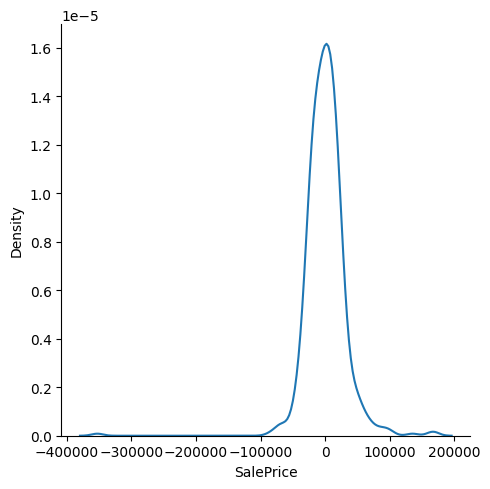

In [3]:
sns.displot(residuals,kind="kde")